In [2]:
import tensorflow 
from tensorflow import keras 
from keras import layers

In [3]:
#load the data 
(train_data, train_labels), (test_data, test_labels) = keras.datasets.mnist.load_data()

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
train_data = train_data.reshape((train_data.shape[0], train_data.shape[1], train_data.shape[2]*1)) 
test_data = test_data.reshape((test_data.shape[0],test_data.shape[1], test_data.shape[2]*1))
train_data = train_data.astype('float32')/255
test_data = test_data.astype('float32')/255

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define your model
model = Sequential([
    LSTM(64, input_shape=(train_data.shape[1], train_data.shape[2])),
    Dense(10, activation='softmax')
])

C:\Users\Vyshujaanu\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.save('rnn_signature_verfication_model.h5')

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          23,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,458 (95.54 KB)

 Trainable params: 24,458 (95.54 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)

In [11]:
history=model.fit(train_data,train_labels,batch_size=128,
                  epochs=10,validation_split=0.2,callbacks=[early_stop])

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.5472 - loss: 1.3504 - val_accuracy: 0.8741 - val_loss: 0.4014
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8980 - loss: 0.3299 - val_accuracy: 0.9202 - val_loss: 0.2537
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9402 - loss: 0.1961 - val_accuracy: 0.9473 - val_loss: 0.1726
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9578 - loss: 0.1408 - val_accuracy: 0.9647 - val_loss: 0.1164
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9649 - loss: 0.1163 - val_accuracy: 0.9635 - val_loss: 0.1197
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9715 - loss: 0.0934 - val_accuracy: 0.9603 - val_loss: 0.1271
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9757 - loss: 0.0787 - val_accuracy: 0.9735 - val_loss: 0.0885
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9788 - loss: 0.0719 - val_acc

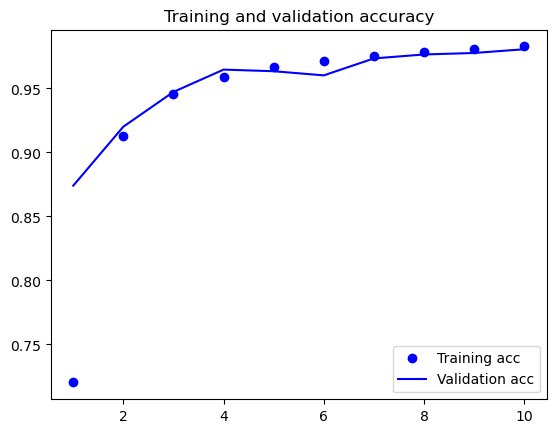

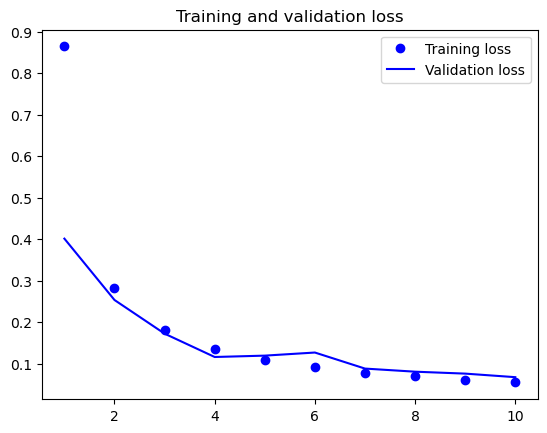

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9744 - loss: 0.0775
Final loss: 6.18%
Final accuracy: 97.98%


In [14]:
import matplotlib.pyplot as plt

# Plot accuracy and loss
acc = history.history['accuracy']  # Use 'accuracy' instead of 'acc'
val_acc = history.history['val_accuracy']  # Use 'val_accuracy' instead of 'val_acc'
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# Plot training and validation loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# If you want to evaluate the model on test data
# Assuming test_data and test_labels are your test dataset
final_loss, final_accuracy = model.evaluate(test_data, test_labels)
print('Final loss: {:.2f}%'.format(final_loss * 100))
print('Final accuracy: {:.2f}%'.format(final_accuracy * 100))
